In [1]:
# import warnings
# warnings.filterwarnings('ignore')
import sys
sys.path.insert(1, r'C:\Users\MattDaykin\PycharmProjects\CNIGuard')
from main import *
from bright_spot_detection import *
from align_and_overlay_ir_vis import *

# Darken VS image
### Output image: darkened-image.png. Rename to "vs_darkened.png"

In [2]:
vs_img = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Hot Spots\A0C77\alignment\A0C77_2022_09_04_00_47_52_vis.jpeg'
vs_img_path = r"C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Hot Spots\A0C77\alignment\\"
vs_img_name = r"A0C77_2022_09_04_00_47_52_vis"
vs_file_name = vs_img_path + vs_img_name
darken_vis_img(vs_img, vs_img_path, vs_img_name)

saving to  C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Hot Spots\A0C77\alignment\\A0C77_2022_09_04_00_47_52_vis_darkened.png


# Add bright alignment spots to original image
## How to: Paint within the images themselves - save with the same file names with "_alignment_added" after the name.

# Align according to these bright spots (don't overlay yet)
### First get alignment points from the brighted_big images

In [3]:
# The images with bright spots added.
ir_img_with_alignment_points = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Hot Spots\A0C77\alignment\greyed_img_A0C77_2022_09_04_00_47_52_alignment_added.png'
vs_img_with_alignment_points = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Hot Spots\A0C77\alignment\A0C77_2022_09_04_00_47_52_vis_darkened_alignment_added.png'

# The images without bright spots.
ir_img_greyed = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Hot Spots\A0C77\greyed_img_A0C77_2022_09_04_00_47_52.png'
ir_img_potential_hot_spots = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Hot Spots\A0C77\potential_hot_spots_A0C77_2022_09_04_00_47_52.png'
ir_img_hot_spots = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Hot Spots\A0C77\hot_spots_A0C77_2022_09_04_00_47_52.png'
ir_img_original = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Hot Spots\A0C77\alignment\original_ir_A0C77_2022_09_04_00_47_52.png'
vs_img_darkened = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Hot Spots\A0C77\alignment\A0C77_2022_09_04_00_47_52_vis_darkened.png'

# Get alignment point coordinates from both images
x_array_ir, y_array_ir = alignment_point_detection(ir_img_with_alignment_points, min_threshold_fraction=0.98, max_threshold_fraction=1.0)
x_array_vs, y_array_vs = alignment_point_detection(vs_img_with_alignment_points, min_threshold_fraction=0.98, max_threshold_fraction=1.0)

# Now pair the coordinates (put them into the format required for the later work)
alignment_points_ir = pair_coordinates(x_array_ir, y_array_ir)
alignment_points_vs = pair_coordinates(x_array_vs, y_array_vs)

Finding alignment points...
Returning array of coordinates for alignment points.
x_array [40, 90, 203, 347]
y_array [183, 17, 12, 163]
Finding alignment points...
Returning array of coordinates for alignment points.
x_array [168, 195, 251, 328]
y_array [310, 206, 205, 303]


### Now align the final images using these alignment points
### Saves as "{file path}/{file name}_aligned.jpg"

In [4]:
# Get the file name reformatted to include "_aligned"
ir_img_greyed_file_output_final = format_file_name(ir_img_greyed)
ir_img_potential_hot_spots_file_output_final = format_file_name(ir_img_potential_hot_spots)
ir_img_hot_spots_file_output_final = format_file_name(ir_img_hot_spots)
ir_img_original_file_output_final = format_file_name(ir_img_original)

align_ir(ir_img_greyed, vs_img, alignment_points_ir, alignment_points_vs, ir_img_greyed_file_output_final)
align_ir(ir_img_potential_hot_spots, vs_img, alignment_points_ir, alignment_points_vs, ir_img_potential_hot_spots_file_output_final)
align_ir(ir_img_hot_spots, vs_img, alignment_points_ir, alignment_points_vs, ir_img_hot_spots_file_output_final)
align_ir(ir_img_original, vs_img, alignment_points_ir, alignment_points_vs, ir_img_original_file_output_final)

array([[ 4.88472407e-01, -6.46824405e-02,  1.50828172e+02],
       [ 1.40831395e-02,  5.33812266e-01,  1.94274960e+02],
       [-1.71063499e-05, -3.04282593e-04,  1.00000000e+00]])

# Now transparentise the aligned.jpg imags using aligned_original_ir.jpg as the mask for knowing where the border is
### Saves as "{file path}/{file name}_transparent.png"

In [5]:
ir_img_greyed_file_output_final_aligned = ir_img_greyed_file_output_final + ".jpg"
ir_img_potential_hot_spots_file_output_final_aligned = ir_img_potential_hot_spots_file_output_final + ".jpg"
ir_img_hot_spots_file_output_final_aligned = ir_img_hot_spots_file_output_final + ".jpg"
ir_img_original_file_output_final_aligned = ir_img_original_file_output_final + ".jpg"

transperentise_aligned_img_background(ir_img_greyed_file_output_final_aligned, ir_img_greyed_file_output_final_aligned, ir_img_greyed_file_output_final)
transperentise_aligned_img_background(ir_img_potential_hot_spots_file_output_final_aligned, ir_img_potential_hot_spots_file_output_final_aligned, ir_img_potential_hot_spots_file_output_final)
transperentise_aligned_img_background(ir_img_hot_spots_file_output_final_aligned, ir_img_hot_spots_file_output_final_aligned, ir_img_hot_spots_file_output_final)
transperentise_aligned_img_background(ir_img_original_file_output_final_aligned, ir_img_original_file_output_final_aligned, ir_img_original_file_output_final)

# Finally, overlay the two images above
### Saves as "{file path}/{file name}_overlaid.png"

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

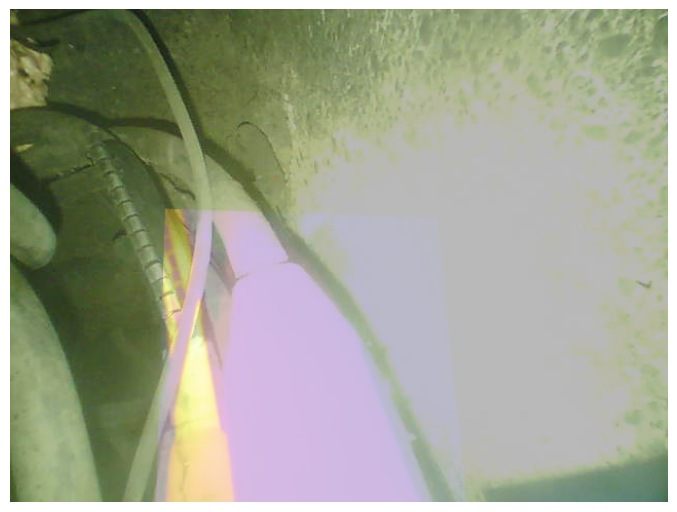

<Figure size 640x480 with 0 Axes>

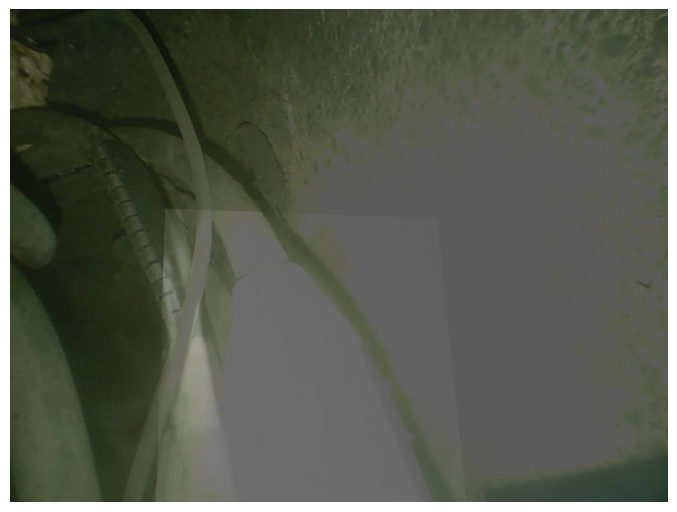

<Figure size 640x480 with 0 Axes>

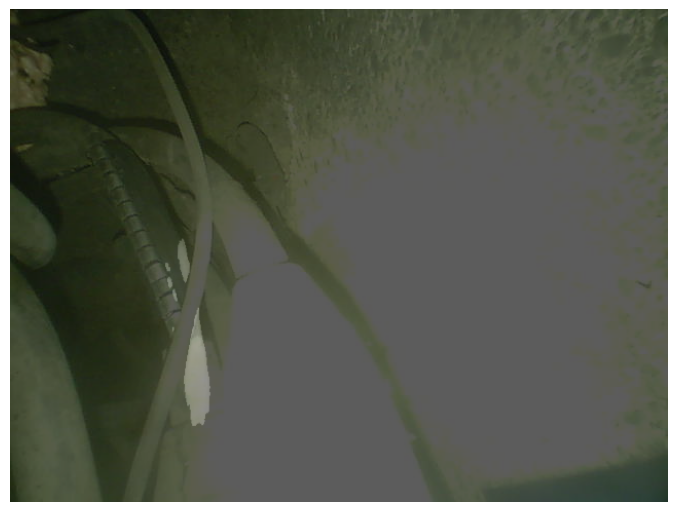

<Figure size 640x480 with 0 Axes>

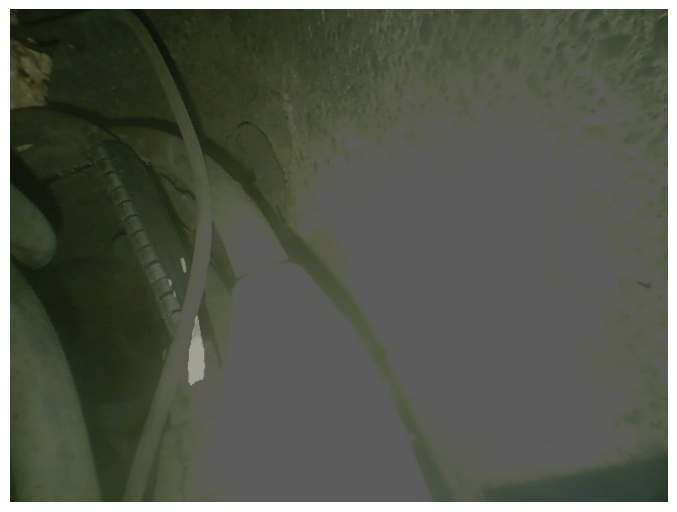

<Figure size 640x480 with 0 Axes>

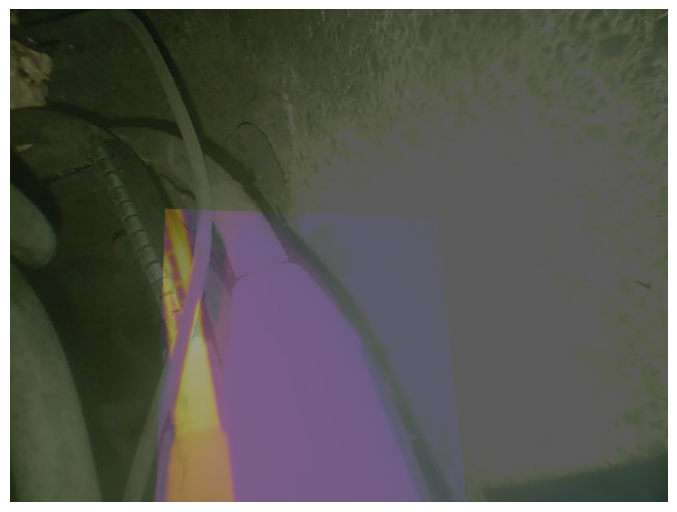

<Figure size 640x480 with 0 Axes>

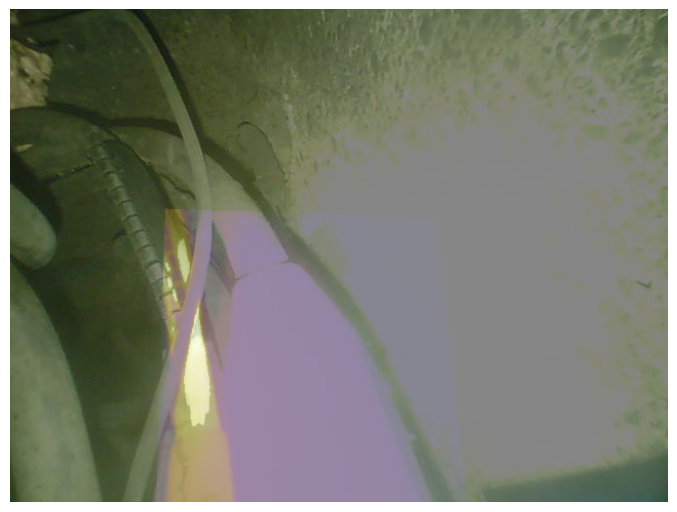

<Figure size 640x480 with 0 Axes>

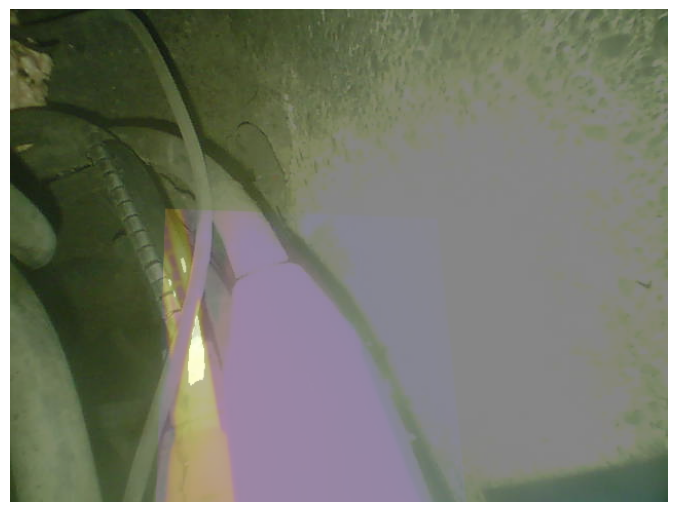

<Figure size 640x480 with 0 Axes>

In [6]:
aligned_transparent_ir_img_greyed = ir_img_greyed_file_output_final + "_transparent.png"
aligned_transparent_ir_img_potential_hot_spots = ir_img_potential_hot_spots_file_output_final + "_transparent.png"
aligned_transparent_ir_img_hot_spots = ir_img_hot_spots_file_output_final + "_transparent.png"
aligned_transparent_ir_img_original = ir_img_original_file_output_final + "_transparent.png"

# Light overlays
overlay_ir_on_vis(aligned_transparent_ir_img_greyed, vs_img, alpha=0.7, file_name=ir_img_greyed_file_output_final)
overlay_ir_on_vis(aligned_transparent_ir_img_potential_hot_spots, vs_img, alpha=0.7, file_name=ir_img_potential_hot_spots_file_output_final)
overlay_ir_on_vis(aligned_transparent_ir_img_hot_spots, vs_img, alpha=0.7, file_name=ir_img_hot_spots_file_output_final)
overlay_ir_on_vis(aligned_transparent_ir_img_original, vs_img, alpha=0.7, file_name=ir_img_original_file_output_final)

# Dark overlays
overlay_ir_on_vis(aligned_transparent_ir_img_greyed, vs_img_darkened, alpha=0.7, file_name=ir_img_greyed_file_output_final+"_dark_vs")
overlay_ir_on_vis(aligned_transparent_ir_img_potential_hot_spots, vs_img_darkened, alpha=0.7, file_name=ir_img_potential_hot_spots_file_output_final+"_dark_vs")
overlay_ir_on_vis(aligned_transparent_ir_img_hot_spots, vs_img_darkened, alpha=0.7, file_name=ir_img_hot_spots_file_output_final+"_dark_vs")
overlay_ir_on_vis(aligned_transparent_ir_img_original, vs_img_darkened, alpha=0.7, file_name=ir_img_original_file_output_final+"_dark_vs")

# Two triple overlays using potential hot spots for one and hot spots for another.
vs_img_overlaid_with_ir = ir_img_original_file_output_final + '_overlaid.png'
overlay_ir_on_vis(aligned_transparent_ir_img_potential_hot_spots, vs_img_overlaid_with_ir, alpha=0.7, file_name=ir_img_potential_hot_spots_file_output_final+"_with_ir_overlaid")
overlay_ir_on_vis(aligned_transparent_ir_img_hot_spots, vs_img_overlaid_with_ir, alpha=0.7, file_name=ir_img_hot_spots_file_output_final+"_with_ir_overlaid")